<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Pandas data structures</big></big></big></big></b></p>

## Required libraries
You are probably all set if you are using JHUB or Google CodeLabs: https://colab.research.google.com/ <br>
If you encounter any difficulties, please make sure you have installed all the following packages:<br>
- Python version 2.6-2.7 or 3.3-3.5
- Pandas version 0.18.0 or later: http://pandas.pydata.org/
- Numpy version 1.7 or later: http://www.numpy.org/
- matplotlib version 1.3 or later: http://matplotlib.org/
- ipython version 3.x with notebook support, or ipython 4.x combined with jupyter: http://ipython.org
- seaborn (this is used for some statistical data visualizations): http://stanford.edu/~mwaskom/software/seaborn/

## Let's set up the environment

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

# Tabular data

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

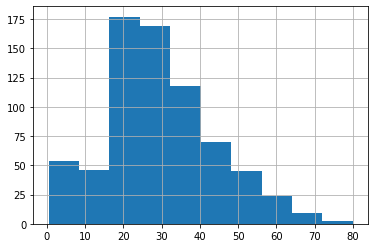

In [4]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [5]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

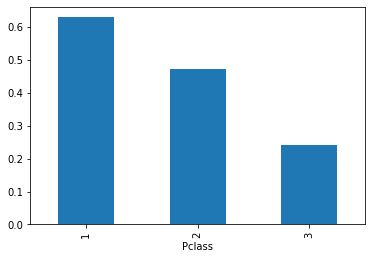

In [6]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

**Are young people more likely to survive?**

In [7]:
df['Survived'].sum() / df['Survived'].count()

0.3838383838383838

In [8]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

All the needed functionality for the above examples will be explained throughout this tutorial.

# Data structures

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [9]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [10]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [11]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [12]:
s[0]

0.1

**Unlike the NumPy array**, though, this index can be something other than integers:

In [13]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [14]:
s2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [15]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

We can index the populations like a dict as expected:

In [16]:
population['France']

64.3

but with the power of numpy arrays:

In [17]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="img/dataframe.png" width=110%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [18]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [19]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [20]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [21]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [22]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [23]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [24]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


To access a Series representing a column in the data, use typical indexing syntax:

In [25]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

# Basic operations on Series/Dataframes

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.


In [26]:
# redefining the example objects

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

### Elementwise-operations (like numpy)

Just like with numpy arrays, many operations are element-wise:

In [27]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

In [28]:
countries['population'] / countries['area']

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

### Alignment! (unlike numpy)

Only, pay attention to **alignment**: operations between series will align on the index:  

In [29]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [30]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [31]:
s2

France     64.3
Germany    81.3
dtype: float64

In [32]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

### Reductions (like numpy)

The average population number:

In [33]:
population.mean()

47.739999999999995

The minimum area:

In [34]:
countries['area'].min()

30510

For dataframes, often only the numeric columns are included in the result:

In [35]:
countries.median()

population        64.3
area          244820.0
dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the population numbers relative to Belgium
</div>

In [36]:
# write your code here
population / population['Belgium']

Germany           7.194690
Belgium           1.000000
France            5.690265
United Kingdom    5.743363
Netherlands       1.495575
dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the population density for each country and add this as a new column to the dataframe.
</div>

In [37]:
# write your code here
countries['density'] = countries['population'] / countries['area']

In [38]:
# write your code here
countries

,country,population,area,capital,density
0,Belgium,11.3,30510,Brussels,0.000370
1,France,64.3,671308,Paris,0.000096
2,Germany,81.3,357050,Berlin,0.000228
3,Netherlands,16.9,41526,Amsterdam,0.000407
4,United Kingdom,64.9,244820,London,0.000265


### Some other useful methods

Sorting the rows of the DataFrame according to the values in a column:

In [39]:
# uncomment the following line after you have created the ´density´
countries.sort_values('density', ascending=False)


,country,population,area,capital,density
3,Netherlands,16.9,41526,Amsterdam,0.000407
0,Belgium,11.3,30510,Brussels,0.000370
4,United Kingdom,64.9,244820,London,0.000265
2,Germany,81.3,357050,Berlin,0.000228
1,France,64.3,671308,Paris,0.000096


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [40]:
countries.describe()

,population,area,density
count,5.000000,5.000000,5.000000
mean,47.740000,269042.800000,0.000273
std,31.519645,264012.827994,0.000123
min,11.300000,30510.000000,0.000096
25%,16.900000,41526.000000,0.000228
50%,64.300000,244820.000000,0.000265
75%,64.900000,357050.000000,0.000370
max,81.300000,671308.000000,0.000407


The `plot` method can be used to quickly visualize the data in different ways:

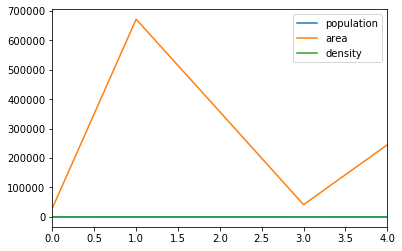

In [41]:
countries.plot()

However, for this dataset, it does not say that much:

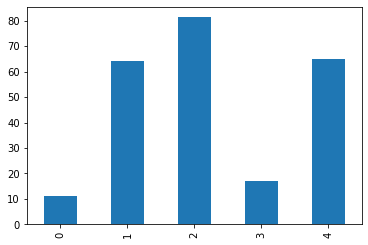

In [42]:
countries['population'].plot(kind='bar')

You can play with the `kind` keyword: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'

## Other features

* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Time series manipulation (resampling, timezones, ..)
* Easy plotting